In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Charger le fichier CSV
url_path = 'https://static.openfoodfacts.org/data/en.openfoodfacts.org.products.csv '
# Charger le fichier CSV dans un DataFrame pandas
df = pd.read_csv(url_path, sep='\t',low_memory=True)  # Assurez-vous de spécifier le bon séparateur s'il est différent de la virgule


KeyboardInterrupt: 

In [72]:
# Afficher les premières lignes du DataFrame pour voir les données
print(df.head())

#On vérifie que la base est bien chargée

df.sample(5)
print ("Le dataset compte {} lignes et {} variables".format(df.shape[0], df.shape[1]))

# Afficher les noms des colonnes du DataFrame
print(df.columns)

#on veut connaître les valeurs de la colonne countries_fr
valeurs_uniques = df['countries_fr'].unique()
print(valeurs_uniques)

valeurs_uniques_tag = df['countries_tags'].unique()
print(valeurs_uniques_tag)



                     code                                                url  \
0       00000000000000225  http://world-en.openfoodfacts.org/product/0000...   
1  0000000000000207025004  http://world-en.openfoodfacts.org/product/0000...   
2    00000000000003429145  http://world-en.openfoodfacts.org/product/0000...   
3    00000000000026772226  http://world-en.openfoodfacts.org/product/0000...   
4           0000000000017  http://world-en.openfoodfacts.org/product/0000...   

          creator   created_t      created_datetime  last_modified_t  \
0  nutrinet-sante  1623855208  2021-06-16T14:53:28Z       1692101569   
1         kiliweb  1656948610  2022-07-04T15:30:10Z       1656948613   
2         kiliweb  1630483911  2021-09-01T08:11:51Z       1682646029   
3         kiliweb  1654250311  2022-06-03T09:58:31Z       1654270474   
4         kiliweb  1529059080  2018-06-15T10:38:00Z       1561463718   

  last_modified_datetime last_modified_by      product_name  \
0   2023-08-15T12:12:49

KeyError: 'countries_fr'

In [36]:
for column_name in df.columns:
    print(column_name)


code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
last_modified_by
product_name
abbreviated_product_name
generic_name
quantity
packaging
packaging_tags
packaging_en
packaging_text
brands
brands_tags
categories
categories_tags
categories_en
origins
origins_tags
origins_en
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_en
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_en
ingredients_text
ingredients_tags
ingredients_analysis_tags
allergens
allergens_en
traces
traces_tags
traces_en
serving_size
serving_quantity
no_nutrition_data
additives_n
additives
additives_tags
additives_en
nutriscore_score
nutriscore_grade
nova_group
pnns_groups_1
pnns_groups_2
food_groups
food_groups_tags
food_groups_en
states
states_tags
states_en
brand_owner
ecoscore_score
ecoscore_grade
nutrient_levels_tags
product_quantity
owner
data_quality_errors_tags
unique_scans_n
popular

In [73]:
name_values_first_100 = df['countries_tags'].iloc[:100]
print("Les 100 premières valeurs dans la colonne 'Name':")
print(name_values_first_100)


Les 100 premières valeurs dans la colonne 'Name':
0      en:france
1     en:germany
2       en:spain
3      en:france
4      en:france
         ...    
95     en:france
96     en:france
97     en:france
98     en:france
99     en:france
Name: countries_tags, Length: 100, dtype: object


In [74]:
# On conserve uniquement les produits vendus en France en excluant les valeurs nulles
df_france = df[df['countries_tags'].str.lower().str.contains('en:france') & df['countries_tags'].notna()]

print ("Le dataset France compte {} lignes et {} variables".format(df_france.shape[0], df.shape[1]))



Le dataset France compte 1012521 lignes et 203 variables


In [76]:
#On calcule le taux de remplissage des variables
def null_factor(df):
  null_rate = ((df_france.isnull().sum() / df_france.shape[0])*100).sort_values(ascending=False).reset_index()
  null_rate.columns = ['Variable','Taux_de_Null']
  return null_rate




/tmp/ipykernel_50715/115072967.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Taux_de_Null", y="Variable", data=filling_features, palette="flare")


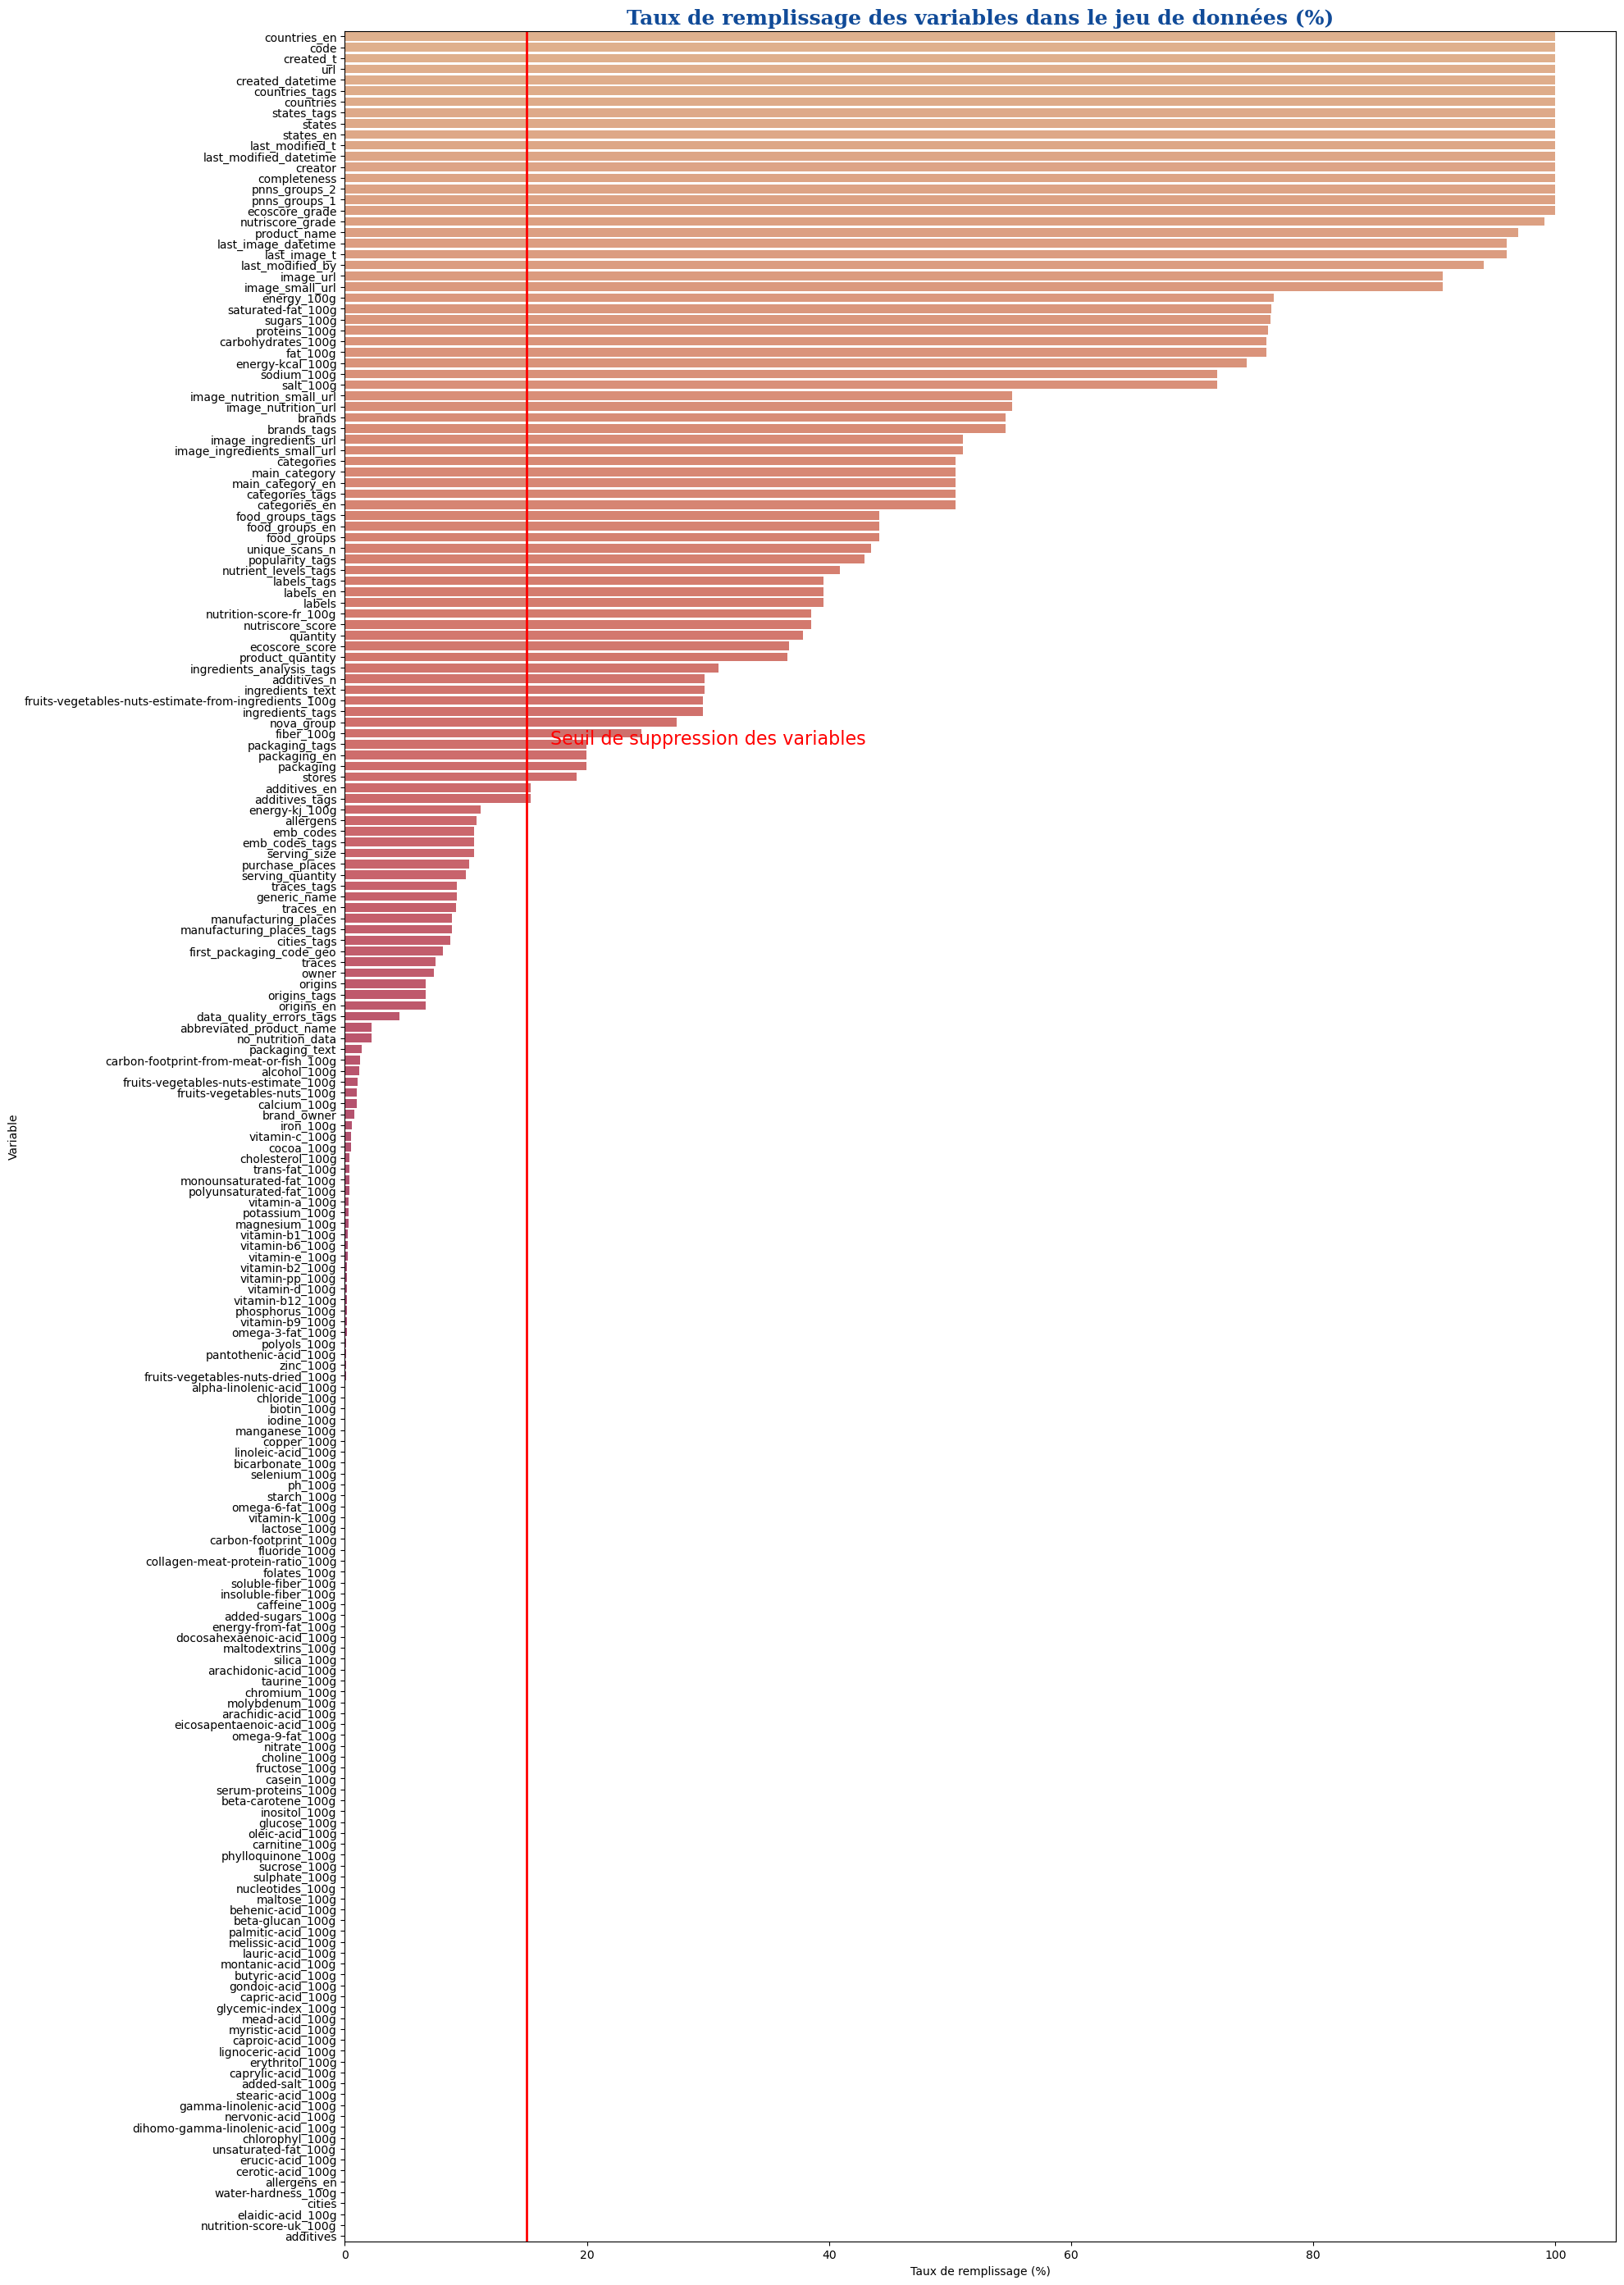

In [77]:
#Nous alllons désormais commencer à nettoyer la base de données en enlevant les colonnes peu remplis. 

filling_features = null_factor(df_france)
filling_features["Taux_de_Null"] = 100-filling_features["Taux_de_Null"]
filling_features = filling_features.sort_values("Taux_de_Null", ascending=False) 

#Seuil de suppression
sup_threshold = 15

fig = plt.figure(figsize=(20, 35))

font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 18,
             }

sns.barplot(x="Taux_de_Null", y="Variable", data=filling_features, palette="flare")
#Seuil pour suppression des varaibles
plt.axvline(x=sup_threshold, linewidth=2, color = 'r')
plt.text(sup_threshold+2, 65, 'Seuil de suppression des variables', fontsize = 16, color = 'r')

plt.title("Taux de remplissage des variables dans le jeu de données (%)", fontdict=font_title)
plt.xlabel("Taux de remplissage (%)")
plt.show()

In [83]:
seuil = 50
variable_conserve = list(filling_features.loc[filling_features['Taux_de_Null'] >= seuil, 'Variable'].values)

#Nouveau Dataset avec les variables conservées
df_france_cleaned = df_france[variable_conserve]

# Affichage du résultat
print ("Le dataset France_cleaned compte {} lignes et {} variables".format(df_france_cleaned.shape[0], df_france_cleaned.shape[1]))

for column_name in df_france_cleaned.columns:
    print(column_name)


Le dataset France_cleaned compte 1012521 lignes et 44 variables
countries_en
code
created_t
url
created_datetime
countries_tags
countries
states_tags
states
states_en
last_modified_t
last_modified_datetime
creator
completeness
pnns_groups_2
pnns_groups_1
ecoscore_grade
nutriscore_grade
product_name
last_image_datetime
last_image_t
last_modified_by
image_url
image_small_url
energy_100g
saturated-fat_100g
sugars_100g
proteins_100g
carbohydrates_100g
fat_100g
energy-kcal_100g
sodium_100g
salt_100g
image_nutrition_small_url
image_nutrition_url
brands
brands_tags
image_ingredients_url
image_ingredients_small_url
categories
main_category
main_category_en
categories_tags
categories_en


In [85]:
#première analyse statistique
df_france_cleaned.describe()

df_france_cleaned = df_france_cleaned[(df_france_cleaned['nutriscore_grade'].isnull()==False)]
print ("Le dataset France compte {} lignes et {} variables".format(df_france_cleaned.shape[0], df_france_cleaned.shape[1]))


Le dataset France compte 1003042 lignes et 44 variables


Le dataset France compte 1012521 lignes et 203 variables


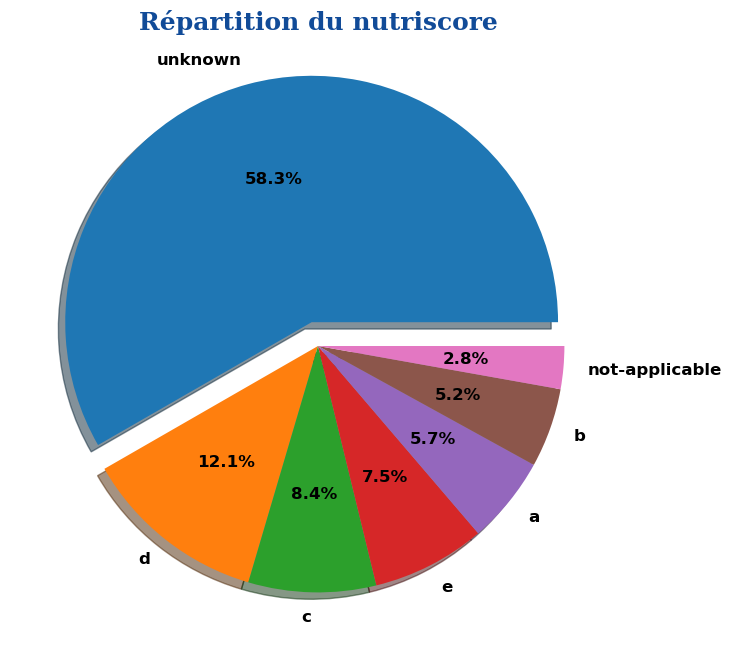

In [86]:
df_france_cleaned = df_france_cleaned[(df_france_cleaned['nutriscore_grade'].isnull()==False)]
print ("Le dataset France compte {} lignes et {} variables".format(df_france.shape[0], df.shape[1]))



nutriscore = df_france_cleaned.groupby(by='nutriscore_grade')['code'].nunique().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

explodes = np.zeros(len(nutriscore))
explodes[0] = 0.1  # If you want to explode the first slice

plt.pie(nutriscore, labels=nutriscore.index,
        startangle=0,
        shadow=True,
        explode=explodes,
        autopct='%1.1f%%',
        textprops=dict(color="black", size=12, weight="bold"))
plt.title("Répartition du nutriscore", fontdict=font_title)
plt.show()


In [87]:
#analyse des corrélations


df_nutriscore = datas[(datas['nutriscore_grade'].isnull()==False)]

sns.pairplot(datas_nutri.sample(frac=0.05), hue="nutriscore_grade")


NameError: name 'datas' is not defined